In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import math
import scipy
from matplotlib.pyplot import figure

In [2]:
#defining parameters

#total mass of the system in kg
m = 4

#moment of inertia (kg/m^2)
I = 0.51

#resonance frequency (hz)


#centre of mass offset (m)
#It is the vertical distance from centre of mass and the pivot axis 

com_offset = -0.000003

#felxure angular stiffness (Nm/rad)
k = .0025

#flexure thickness (m)

#quality factor 

q = 5000

#acceleration due to gravity (m/s^2)
g = 9.8 



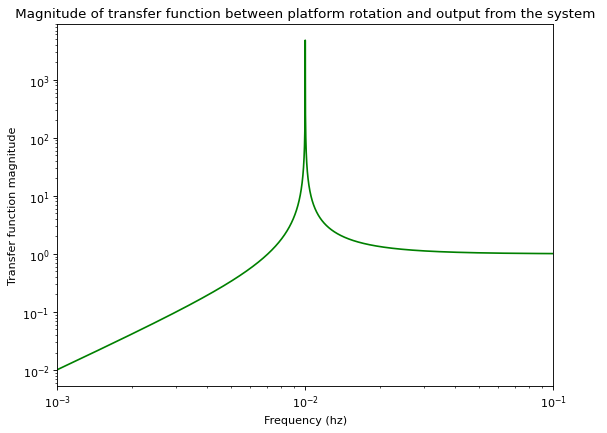

In [3]:
#Magnitude of transfer function for the system output in response to  platform rotation
#external torque and acceleration is set to zero.

#Equation 

w_g = (m*g*com_offset)/I

q_new = q*((k+(m*g*com_offset))/k) 

w = np.linspace(0.001 , 0.1 , 10000)

w_0 = 0.010

x = np.sqrt((w**2)**2 + (- w_g**2)**2)

y = np.sqrt(((w**2 - w_0**2)**2) + (w_0**4)/(q_new**2))


tf_rotation = x/y

#plotting figures

figure(figsize=(8, 6), dpi=80)
plt.plot(w , tf_rotation , "-g" )


#plt.ylim(0.01, 30)
plt.yscale('log')
plt.xlim(0.001, 0.1)
plt.xscale('log')


plt.title(" Magnitude of transfer function between platform rotation and output from the system ")
plt.xlabel('Frequency (hz)')
plt.ylabel('Transfer function magnitude')
plt.show()



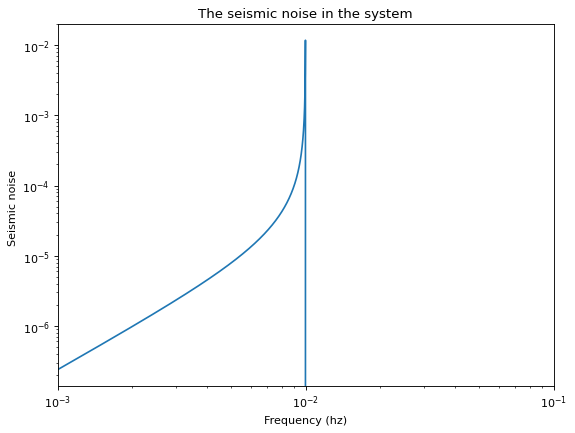

In [4]:

# Equation for finding the seismic noise in the system

p = (m*w**2*com_offset)

q = I * (w**2 - w_0**2 - (complex(0,1)*(w_0**2 / q_new)))

noise_s = p/q

#plotting graph

figure(figsize=(8, 6), dpi=80)
#plt.plot(w , noise_s , "-y" 
plt.plot(w,np.real(noise_s))
plt.plot(w,np.imag(noise_s))

plt.xlabel('Frequency (hz)')

plt.yscale('log')
plt.ylabel('Seismic noise ')

plt.xscale('log')
plt.xlim(0.001, 0.1)


plt.title("The seismic noise in the system")
plt.show()

/local/environments/default/default-venv/lib64/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


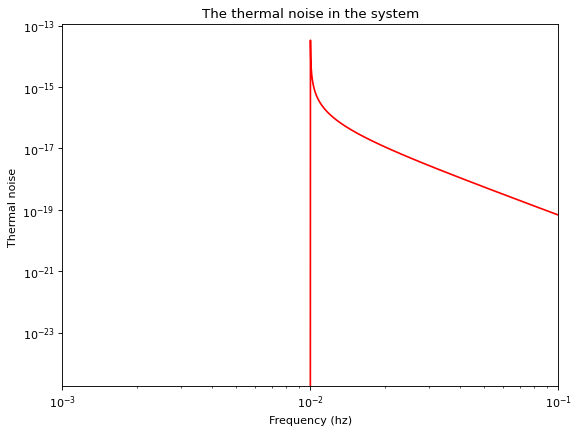

In [5]:


t = 298.15
k_b = 1.1381*(10**-23)

phi = 1/q

# Power spectral density equation

spd = (4 * k_b * t *k * phi) / w

#spd = np.sqrt(a/b)

#Plotting the figures


figure(figsize=(8, 6), dpi=80)
plt.plot(w , spd , "-r" )

plt.xlabel('Frequency (hz)')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Thermal noise ')

plt.title("The thermal noise in the system")
plt.xlim(0.001, 0.1)

plt.show()





